In [507]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
video_game = pd.read_csv("top100videogamesales.csv")
import numpy as np

QUESTION 01: Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

In [508]:
video_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


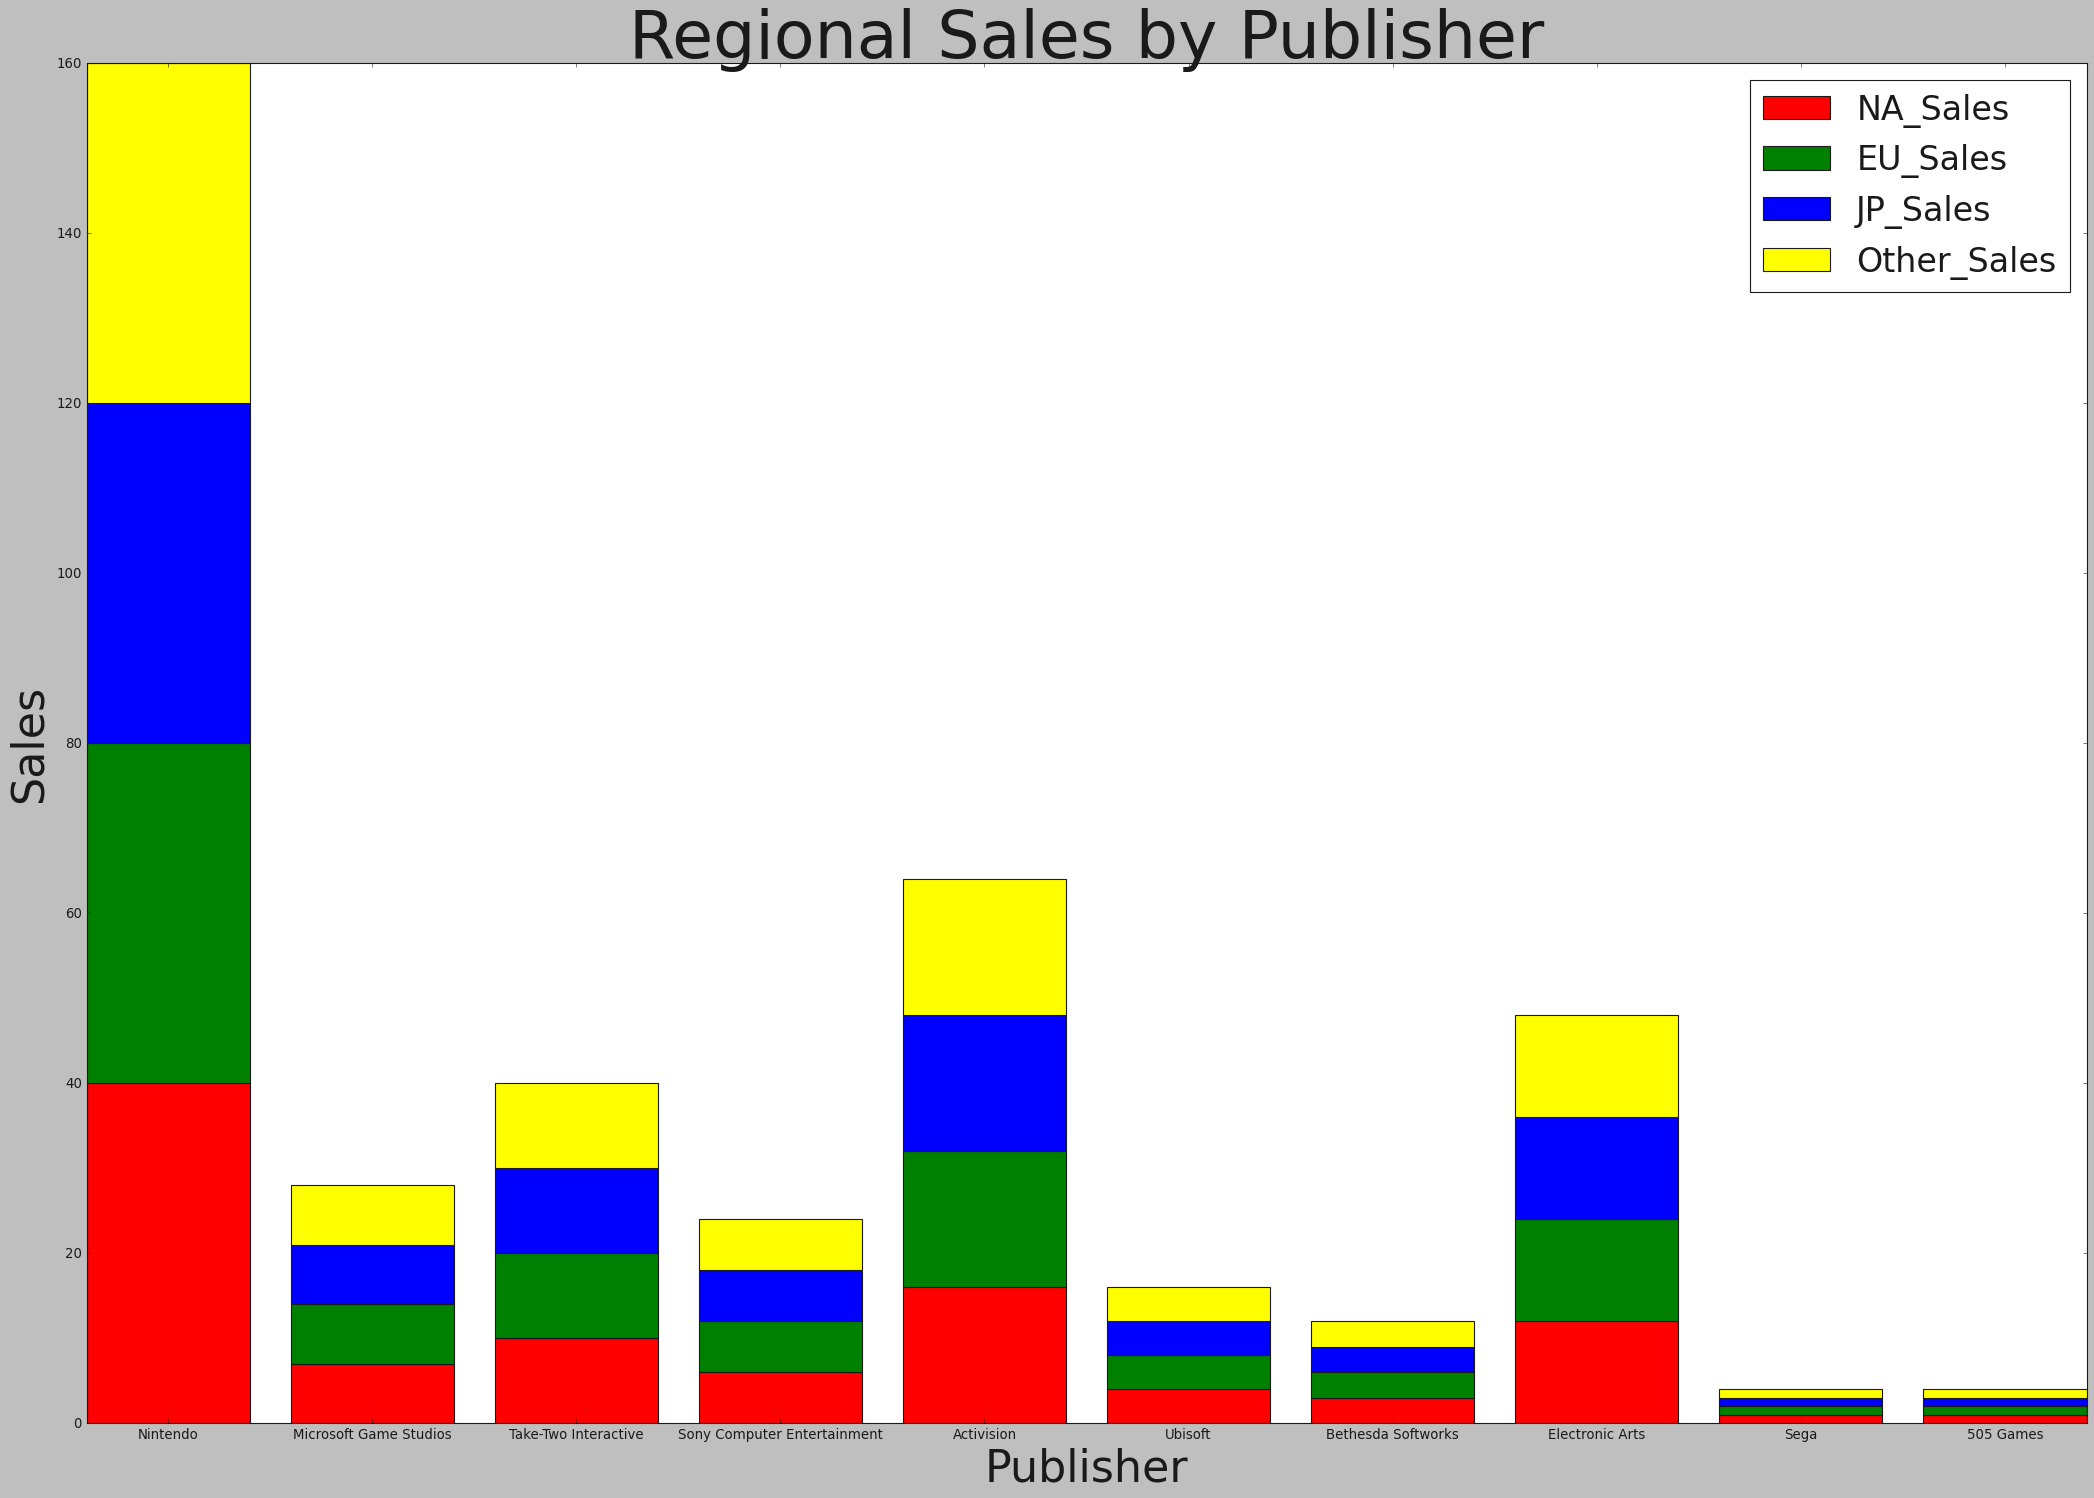

In [615]:
Publishers = np.array(video_game['Publisher'].unique())
Publishers

Nintendo = video_game[video_game['Publisher']=='Nintendo']
len(Nintendo['NA_Sales'])

NA_Sales = []
EU_Sales = []
JP_Sales = []
Other_Sales = []
for p in Publishers:
    ps = video_game[video_game['Publisher'] == p]
    NA_Sales.append(len(ps['NA_Sales']))
    EU_Sales.append(len(ps['NA_Sales']))
    JP_Sales.append(len(ps['NA_Sales']))
    Other_Sales.append(len(ps['NA_Sales']))
labels = []
for p in Publishers:
    labels.append(p)

NA_Sales = np.array(NA_Sales)
EU_Sales = np.array(EU_Sales)
JP_Sales = np.array(JP_Sales)
Other_Sales = np.array(Other_Sales)
labels = np.array(labels)

fig = plt.figure(figsize=(34,21))

ax = fig.add_axes([0.1, 0.1, 1, 1])

ax.bar(labels, NA_Sales, color='red')
ax.bar(labels, EU_Sales, bottom=NA_Sales, color='green')
ax.bar(labels, JP_Sales, bottom=NA_Sales+EU_Sales, color='blue')
ax.bar(labels, Other_Sales, bottom=NA_Sales+EU_Sales+JP_Sales, color='yellow')

fig.set_size_inches(25,17)

plt.xlabel('Publisher', loc='center', fontsize=40)
plt.ylabel('Sales', fontsize=40)
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], fontsize=30)
plt.title("Regional Sales by Publisher", fontsize=60)

plt.show()

As we can see Nintendo is the king of sales no matter the region.

Besides as we can see all the Publishers sell approximately the same in all regions.

QUESTION 02: Global Sales by Year: Create a line chart to show the total global sales for each year.

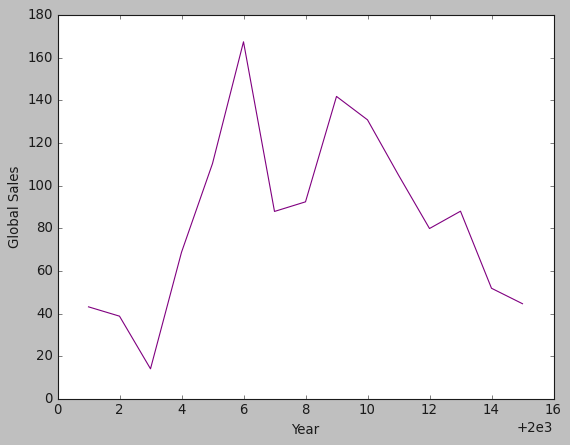

In [711]:
year_sales = video_game[['Year','Global_Sales']].sort_values(by='Year')
sales_01 = sum(np.array(year_sales[year_sales['Year'] == 2001]['Global_Sales']))
sales_02 = sum(np.array(year_sales[year_sales['Year'] == 2002]['Global_Sales']))
sales_03 = sum(np.array(year_sales[year_sales['Year'] == 2003]['Global_Sales']))
sales_04 = sum(np.array(year_sales[year_sales['Year'] == 2004]['Global_Sales']))
sales_05 = sum(np.array(year_sales[year_sales['Year'] == 2005]['Global_Sales']))
sales_06 = sum(np.array(year_sales[year_sales['Year'] == 2006]['Global_Sales']))
sales_07 = sum(np.array(year_sales[year_sales['Year'] == 2007]['Global_Sales']))
sales_08 = sum(np.array(year_sales[year_sales['Year'] == 2008]['Global_Sales']))
sales_09 = sum(np.array(year_sales[year_sales['Year'] == 2009]['Global_Sales']))
sales_10 = sum(np.array(year_sales[year_sales['Year'] == 2010]['Global_Sales']))
sales_11 = sum(np.array(year_sales[year_sales['Year'] == 2011]['Global_Sales']))
sales_12 = sum(np.array(year_sales[year_sales['Year'] == 2012]['Global_Sales']))
sales_13 = sum(np.array(year_sales[year_sales['Year'] == 2013]['Global_Sales']))
sales_14 = sum(np.array(year_sales[year_sales['Year'] == 2014]['Global_Sales']))
sales_15 = sum(np.array(year_sales[year_sales['Year'] == 2015]['Global_Sales']))

years_values = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
sales_values = [sales_01, sales_02, sales_03, sales_04, sales_05, sales_06, sales_07, sales_08, sales_09, sales_10, sales_11, sales_12, sales_13, sales_14, sales_15]

year_sales_data = np.array([years_values, sales_values])

year_sales_data.T

final_data = pd.DataFrame(year_sales_data.T)

final_data.rename(columns={0:'Year', 1:'Global Sales'}, inplace=True)

final_data

sns.lineplot(data=final_data, x='Year', y='Global Sales', markers=True, color='Purple')

plt.show()

As we can see sales start to increase in a very strong way during 2003, reaching their peak at 2006. Then they decrease fast along 2007 to keep varying along 5 years. Eventually, after 2012 they start to decrease again.

QUESTION 03: Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre.

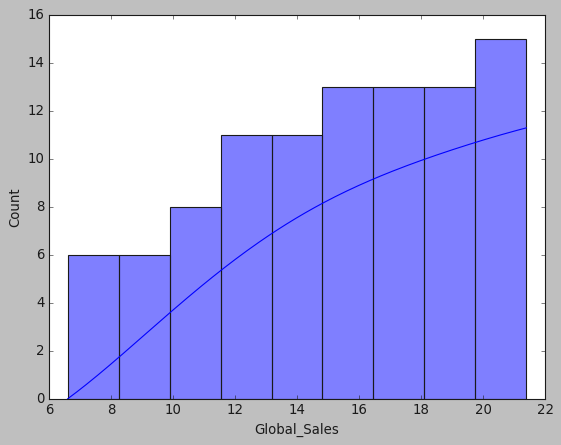

In [663]:
Action = video_game[video_game['Genre'] == 'Action']
sns.histplot(data=Action, x='Global_Sales', bins=9, cumulative=True, kde=True, color='Blue')
plt.show()

Global Sales of Action video games are concentrated in the cheaper ones (66%).

QUESTION 04: North American Sales by Genre: Create a pie chart to show the percentage of sales genre had in the North American market. (Group smaller "slices" together into an "other" category to create an easier to read chart). Detail what is included in the other category.

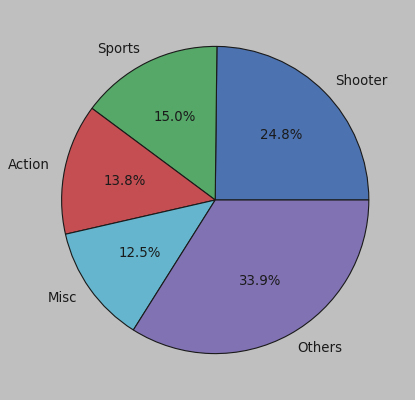

(None,
 array([0.24822808, 0.15000795, 0.13752938, 0.12478569, 0.33944889]),
 array(['Shooter', 'Sports', 'Action', 'Misc', 'Others'], dtype='<U7'),
 array([0.1 , 0.09, 0.03, 0.09, 0.01, 0.03]),
 ['Racing', 'Platform', 'Simulation', 'Role_Playing', 'Puzzle', 'Fighting'])

In [536]:
Sports = video_game[video_game['Genre']=='Sports']
Racing = video_game[video_game['Genre']=='Racing']
Platform = video_game[video_game['Genre']=='Platform']
Misc = video_game[video_game['Genre']=='Misc']
Simulation = video_game[video_game['Genre']=='Simulation']
Action = video_game[video_game['Genre']=='Action']
Role_Playing = video_game[video_game['Genre']=='Role-Playing']
Puzzle = video_game[video_game['Genre']=='Puzzle']
Shooter = video_game[video_game['Genre']=='Shooter']
Fighting = video_game[video_game['Genre']=='Fighting']

NA_Sports = sum(np.array(Sports['NA_Sales'])).__round__(2)
NA_Racing = sum(np.array(Racing['NA_Sales'])).__round__(2)
NA_Platform = sum(np.array(Platform['NA_Sales'])).__round__(2)
NA_Misc = sum(np.array(Misc['NA_Sales'])).__round__(2)
NA_Simulation = sum(np.array(Simulation['NA_Sales'])).__round__(2)
NA_Action = sum(np.array(Action['NA_Sales'])).__round__(2)
NA_Role_Playing = sum(np.array(Role_Playing['NA_Sales'])).__round__(2)
NA_Puzzle = sum(np.array(Puzzle['NA_Sales'])).__round__(2)
NA_Shooter = sum(np.array(Shooter['NA_Sales'])).__round__(2)
NA_Fighting = sum(np.array(Fighting['NA_Sales'])).__round__(2)

NA_Total_array = np.array([NA_Sports, NA_Racing, NA_Platform, NA_Misc, NA_Simulation, NA_Action, NA_Role_Playing, NA_Puzzle, NA_Shooter, NA_Fighting])

NA_Total = [NA_Sports, NA_Racing, NA_Platform, NA_Misc, NA_Simulation, NA_Action, NA_Role_Playing, NA_Puzzle, NA_Shooter, NA_Fighting]

genres_array = video_game['Genre'].unique()

genres_list_na = ['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action', 'Role_Playing', 'Puzzle', 'Shooter', 'Fighting']

top_p_na = []
top_g_na = []


while len(top_p_na) < 4:
    for p in NA_Total:
        if p == max(NA_Total):
            top_p_na.append(p)
            top_g_na.append(genres_list_na[NA_Total.index(p)])
            genres_list_na.remove(genres_list_na[NA_Total.index(p)])
            NA_Total.remove(p)
        else:
            continue

rest_na = sum(np.array(NA_Total)).__round__(2)
top_p_na, top_g_na, NA_Total, rest_na, genres_list_na
na_values = np.append(top_p_na, np.array([rest_na]))
na_labels = np.append(top_g_na, np.array(['Others']))
na_values = na_values/sum(NA_Total_array)
rest_detail_na = (NA_Total/sum(NA_Total_array)).round(2)

plt.pie(na_values, labels=na_labels, autopct='%1.1f%%')
plt.show(), na_values, na_labels, rest_detail_na, genres_list_na

The 'Others' category represents the 33.9% of the total Genres. And is composed by the following categories:

    a) Racing 10%
    b) Platform 9%
    c) Role_Playing 8%
    d) Simulation 3%
    e) Fighting 3%
    f) Puzzle 1%

As we can see in North America the most popular Genre by far is 'Shooter'.

QUESTION 05: European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller "slices" together into an "other" category to create an easier to read chart). Detail what is included in the other category. Explain the chart using markdown.

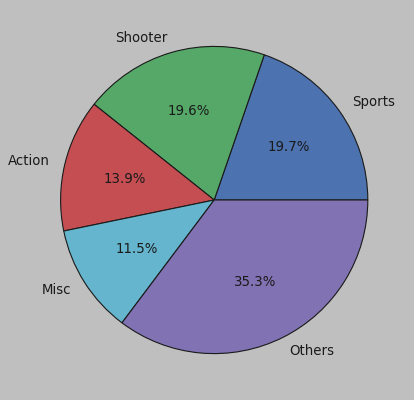

(None,
 array([0.19710743, 0.19578826, 0.13947185, 0.11512724, 0.35250522]),
 array(['Sports', 'Shooter', 'Action', 'Misc', 'Others'], dtype='<U7'),
 array([0.11, 0.08, 0.06, 0.09, 0.01, 0.01]),
 ['Racing', 'Platform', 'Simulation', 'Role_Playing', 'Puzzle', 'Fighting'])

In [535]:
Sports = video_game[video_game['Genre']=='Sports']
Racing = video_game[video_game['Genre']=='Racing']
Platform = video_game[video_game['Genre']=='Platform']
Misc = video_game[video_game['Genre']=='Misc']
Simulation = video_game[video_game['Genre']=='Simulation']
Action = video_game[video_game['Genre']=='Action']
Role_Playing = video_game[video_game['Genre']=='Role-Playing']
Puzzle = video_game[video_game['Genre']=='Puzzle']
Shooter = video_game[video_game['Genre']=='Shooter']
Fighting = video_game[video_game['Genre']=='Fighting']

EU_Sports = sum(np.array(Sports['EU_Sales'])).__round__(2)
EU_Racing = sum(np.array(Racing['EU_Sales'])).__round__(2)
EU_Platform = sum(np.array(Platform['EU_Sales'])).__round__(2)
EU_Misc = sum(np.array(Misc['EU_Sales'])).__round__(2)
EU_Simulation = sum(np.array(Simulation['EU_Sales'])).__round__(2)
EU_Action = sum(np.array(Action['EU_Sales'])).__round__(2)
EU_Role_Playing = sum(np.array(Role_Playing['EU_Sales'])).__round__(2)
EU_Puzzle = sum(np.array(Puzzle['EU_Sales'])).__round__(2)
EU_Shooter = sum(np.array(Shooter['EU_Sales'])).__round__(2)
EU_Fighting = sum(np.array(Fighting['EU_Sales'])).__round__(2)

EU_Total_array = np.array([EU_Sports, EU_Racing, EU_Platform, EU_Misc, EU_Simulation, EU_Action, EU_Role_Playing, EU_Puzzle, EU_Shooter, EU_Fighting])

EU_Total = [EU_Sports, EU_Racing, EU_Platform, EU_Misc, EU_Simulation, EU_Action, EU_Role_Playing, EU_Puzzle, EU_Shooter, EU_Fighting]

genres_array = video_game['Genre'].unique()

genres_list = ['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action', 'Role_Playing', 'Puzzle', 'Shooter', 'Fighting']

top_p_eu = []
top_g_eu = []


while len(top_p_eu) < 4:
    for p in EU_Total:
        if p == max(EU_Total):
            top_p_eu.append(p)
            top_g_eu.append(genres_list[EU_Total.index(p)])
            genres_list.remove(genres_list[EU_Total.index(p)])
            EU_Total.remove(p)
        else:
            continue

rest_eu = sum(np.array(EU_Total)).__round__(2)
top_p_eu, top_g_eu, EU_Total, rest_eu, genres_list
eu_values = np.append(top_p_eu, np.array([rest_eu]))
eu_labels = np.append(top_g_eu, np.array(['Others']))
eu_values = eu_values/sum(EU_Total_array)
rest_detail = (EU_Total/sum(EU_Total_array)).round(2)

plt.pie(eu_values, labels=eu_labels, autopct='%1.1f%%')
plt.show(), eu_values, eu_labels, rest_detail, genres_list

The 'Others' category represents the 35.3% of the total Genres. And is composed by the following categories:

    a) Racing 11%
    b) Role-Playing 9%
    c) Platform 8%
    d) Simulation 6%
    e) Fighting 1%
    f) Puzzle 1%

As we can see in the European Union the most popular Genres are both 'Sports' and 'Shooter'.

QUESTION 06: Explain differences and similarities between the North American and European charts in markdown.

a) In North America the most popular Genre is 'Shooter' whereas in the European Union is 'Sports'.
b) The top four Genres are the same in both regions with the difference pointed put before.
c) Fighting and Puzzle are the less popular Genres in both regions
d) In both regions the top 4 Genres represent approximately 66% of the total sales.
e) In Europe the Genre 'Simulation' is twice more popular than in North America.

Final conclusion: In broad terms I would say preferences in North America and the European Union are quite similar. Although I must highlight that in North America the Genre 'Shooter' is by far the most popular, whereas in the European Union both Genre 'Shooter' and 'Sports' are considered the most popular.

QUESTION 07: Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

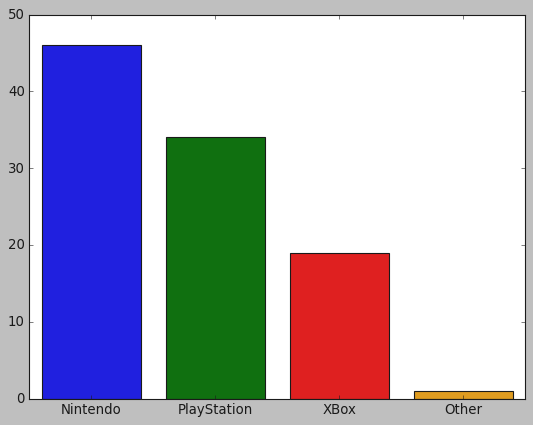

In [668]:
nintendo = video_game[video_game['Platform']=='Nintendo']
playstation = video_game[video_game['Platform']=='PlayStation']
xbox = video_game[video_game['Platform']=='XBox']
other = video_game[video_game['Platform']=='Other']

platform_values = np.array([len(nintendo), len(playstation), len(xbox), len(other)])
platform_labels = np.array(['Nintendo', 'PlayStation', 'XBox', 'Other'])

sns.barplot(x=platform_labels, y=platform_values, palette=['Blue', 'Green','Red','Orange'])
plt.show()

Again Nintendo is the leader here with almost 50. Followed by PlayStation with around 35 and eventually we've got XBox with around 20.

EXTRA CREDIT --> QUESTION 01: Determine the appropriate charts to answer the following questions:

                    a) What genre of game is present the most in the top 100 games from 2000-2015?

                    b) What percentage of global sales does PlayStation have in the dataset?

                    c) What is the distribution of sales for Shooter games?

a) I think we can have a clear idea of this by using a Pie Chart.

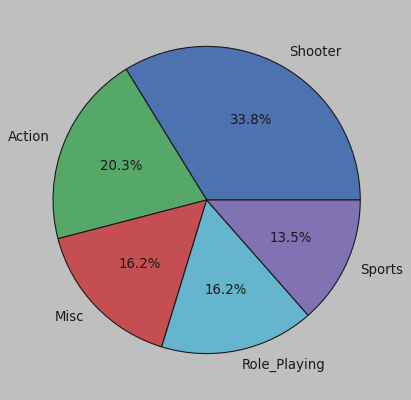

In [564]:
Sports = len(video_game[video_game['Genre']=='Sports'])/len(video_game)
Racing = len(video_game[video_game['Genre']=='Racing'])/len(video_game)
Platform = len(video_game[video_game['Genre']=='Platform'])/len(video_game)
Misc = len(video_game[video_game['Genre']=='Misc'])/len(video_game)
Simulation = len(video_game[video_game['Genre']=='Simulation'])/len(video_game)
Action = len(video_game[video_game['Genre']=='Action'])/len(video_game)
Role_Playing = len(video_game[video_game['Genre']=='Role-Playing'])/len(video_game)
Puzzle = len(video_game[video_game['Genre']=='Puzzle'])/len(video_game)
Shooter = len(video_game[video_game['Genre']=='Shooter'])/len(video_game)
Fighting = len(video_game[video_game['Genre']=='Fighting'])/len(video_game)

global_genre_list_v = [Sports, Racing, Platform, Misc, Simulation, Action, Role_Playing, Puzzle, Shooter, Fighting]
global_genre_list_l = ['Sports', 'Racing', 'Platform', 'Misc', 'Simulation','Action', 'Role_Playing', 'Puzzle', 'Shooter', 'Fighting']


top_p_global = []
top_g_global = []


while len(top_p_global) < 5:
    for p in global_genre_list_v:
        if p == max(global_genre_list_v):
            top_p_global.append(p)
            top_g_global.append(global_genre_list_l[global_genre_list_v.index(p)])
            global_genre_list_l.remove(global_genre_list_l[global_genre_list_v.index(p)])
            global_genre_list_v.remove(p)
        else:
            continue

global_values = np.array(top_p_global)
global_labels = np.array(top_g_global)

plt.pie(global_values, labels=global_labels, autopct='%1.1f%%')
plt.show()


As we can see the most popular Genre is 'Shooter' by far.

b) The most suitable chart for this question is a Pie Chart

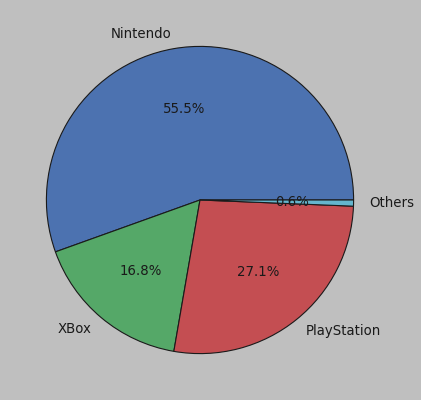

In [583]:
nintendo_sales = sum(np.array(video_game[video_game['Platform']=='Nintendo']['Global_Sales'])).__round__(2)
xbox_sales = sum(np.array(video_game[video_game['Platform']=='XBox']['Global_Sales'])).__round__(2)
playstation_sales = sum(np.array(video_game[video_game['Platform']=='PlayStation']['Global_Sales'])).__round__(2)
other_sales = sum(np.array(video_game[video_game['Platform']=='Other']['Global_Sales'])).__round__(2)

total_sales = nintendo_sales + xbox_sales + playstation_sales + other_sales

sales_values = np.array([nintendo_sales, xbox_sales, playstation_sales, other_sales])/total_sales
sales_labels = np.array(['Nintendo','XBox','PlayStation','Others'])

plt.pie(sales_values, labels=sales_labels, autopct='%1.1f%%')
plt.show()

As we can see Nintendo is by far the Platform with a higher volume of sales.

c) The most suitable chart for this question is a Histogram

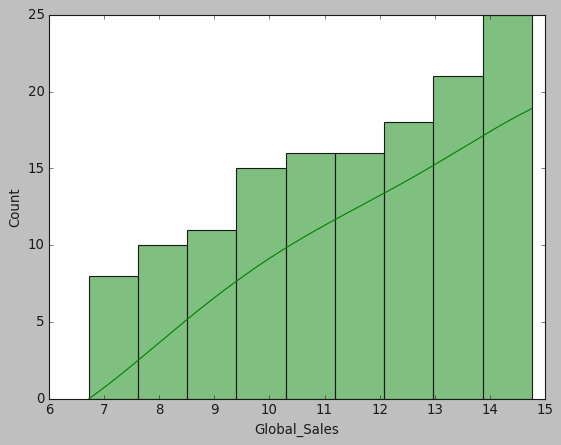

In [664]:
shooter_games = video_game[video_game['Genre']=='Shooter']

sns.histplot(data=shooter_games, x='Global_Sales', bins=9, cumulative=True, kde=True, color='Green')
plt.show()


As we can see around 50% of the Global Sales are concentrated in the low cost market. And close to a 40% is concentrated in the high cost market. This means that either people prefer to buy as cheap as possible or high quality. I guess that people that must be careful with prices look for the cheapest and people who can easily afford the video game look for the highest quality regardless of the price.